### RQ2: How did it vary by energy type(Oil, Gas and Electricity)?

In [38]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import statsmodels.api as sm
from scipy.stats import f_oneway, shapiro, levene
from pingouin import welch_anova

In [3]:
# Data
years = list(range(2010, 2023))
oil = [7159, 6547, 6088, 6202, 6159, 6483, 6736, 6778, 7044, 7022, 5825, 5976, 6616]
gas = [1590, 1506, 1624, 1631, 1619, 1715, 1794, 1821, 1962, 1973, 1960, 1951, 1808]
electricity = [2184, 2139, 2135, 2138, 2134, 2218, 2268, 2291, 2398, 2445, 2464, 2582, 2646]

In [4]:
# Convert years to datetime
dates = pd.to_datetime([f"{year}-01-01" for year in years])

# Create DataFrame for better plotting
data = pd.DataFrame({
    'Date': dates,
    'Oil': oil,
    'Gas': gas,
    'Electricity': electricity
})

In [5]:
# Descriptive Statistics
data.describe()

,Date,Oil,Gas,Electricity
count,13,13.000000,13.000000,13.000000
mean,2016-01-01 09:13:50.769230848,6510.384615,1765.692308,2310.923077
min,2010-01-01 00:00:00,5825.000000,1506.000000,2134.000000
25%,2013-01-01 00:00:00,6159.000000,1624.000000,2139.000000
50%,2016-01-01 00:00:00,6547.000000,1794.000000,2268.000000
75%,2019-01-01 00:00:00,6778.000000,1951.000000,2445.000000
max,2022-01-01 00:00:00,7159.000000,1973.000000,2646.000000
std,NaN,433.518846,163.266849,178.756101


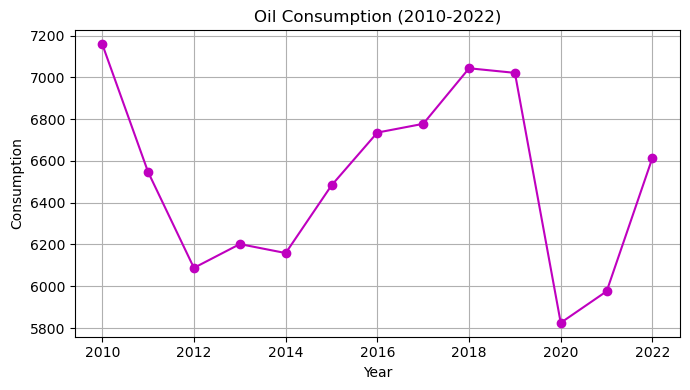

In [6]:
# Plotting Oil Consumption
plt.figure(figsize=(7, 4))
plt.plot(data['Date'], data['Oil'], marker='o', color='m', linestyle='-', label='Oil')
plt.title('Oil Consumption (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

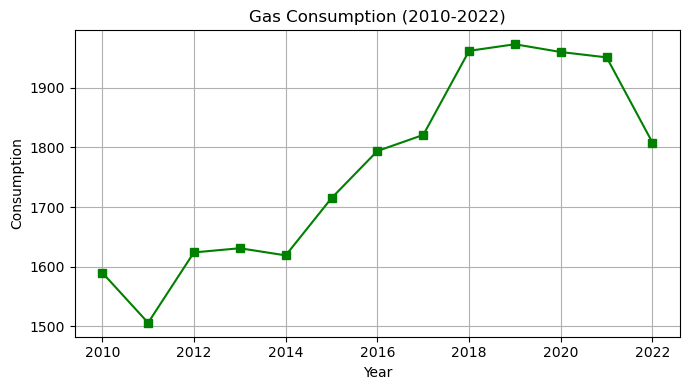

In [7]:
# Plotting Gas Consumption
plt.figure(figsize=(7, 4))
plt.plot(data['Date'], data['Gas'], marker='s', color='green', linestyle='-', label='Gas')
plt.title('Gas Consumption (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

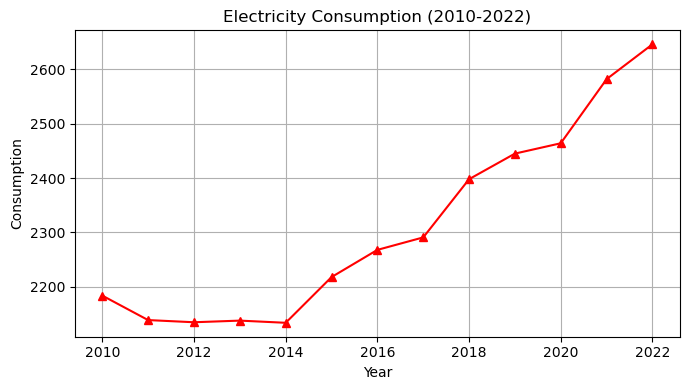

In [8]:
# Plotting Electricity Consumption
plt.figure(figsize=(7, 4))
plt.plot(data['Date'], data['Electricity'], marker='^', color='red', linestyle='-', label='Electricity')
plt.title('Electricity Consumption (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

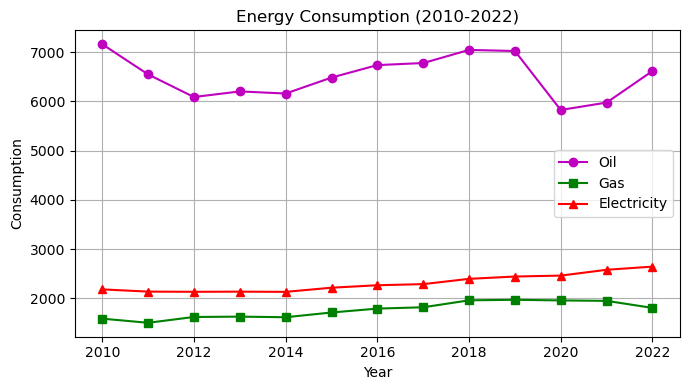

In [9]:
# Plotting all consumption types in one plot
plt.figure(figsize=(7, 4))
plt.plot(data['Date'], data['Oil'], marker='o', color='m', linestyle='-', label='Oil')
plt.plot(data['Date'], data['Gas'], marker='s', color='green', linestyle='-', label='Gas')
plt.plot(data['Date'], data['Electricity'], marker='^', color='red', linestyle='-', label='Electricity')
plt.title('Energy Consumption (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# Perform normality test
oil_norm = shapiro(oil)
gas_norm = shapiro(gas)
electricity_norm = shapiro(electricity)

In [28]:
oil_norm

ShapiroResult(statistic=0.9539353251457214, pvalue=0.658918559551239)

In [29]:
gas_norm

ShapiroResult(statistic=0.904620885848999, pvalue=0.1547531932592392)

In [30]:
electricity_norm

ShapiroResult(statistic=0.8813874125480652, pvalue=0.07446495443582535)

In [23]:
# Perform homogeneity of variances test
levene_test = levene(oil, gas, electricity)
levene_test

LeveneResult(statistic=8.45436419701539, pvalue=0.0009771318839938464)

Since the p-value from the Levene's test is less than 0.05, we reject the null hypothesis of homogeneity of variances. This means that the assumption of homogeneity of variances is violated, and we should consider alternative methods for comparing the means of energy consumption across different types. One such method is the Welch's ANOVA, which does not assume equal variances across groups. 

In [45]:
# Perform Welch's ANOVA
welch_result = welch_anova(dv='value', between='group', data=pd.DataFrame({'value': oil + gas + electricity,
                                                                         'group': ['oil'] * len(oil) + ['gas'] * len(gas) + ['electricity'] * len(electricity)}))

# Print results
print("Welch's ANOVA results:")
print(welch_result)

if welch_result['p-unc'][0] < 0.05:
    print("Reject null hypothesis. There is a significant difference in energy consumption.")
else:
    print("Fail to reject null hypothesis. There is no significant difference in energy consumption.")

Welch's ANOVA results:
  Source  ddof1      ddof2           F         p-unc       np2
0  group      2  22.230392  662.252788  1.545231e-20  0.983399
Reject null hypothesis. There is a significant difference in energy consumption.


Null Hypothesis: The means of the three energy types (Oil, Gas, and Electricity) are equal.

Alternative Hypothesis: At least one of the means of the three energy types is different.

The ANOVA result indicates that there is a statistically significant difference in the means of the three energy types (Oil, Gas, and Electricity).

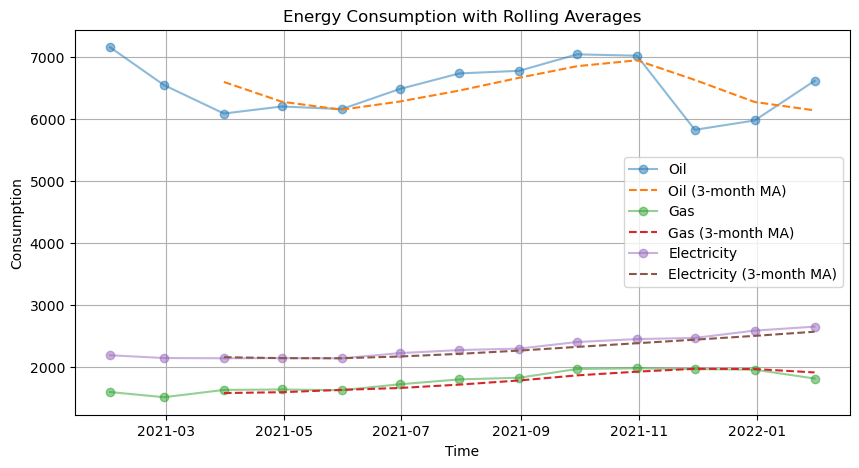

In [11]:
# Add a time index
data.index = pd.date_range(start='2021-01-01', periods=len(data), freq='M')

# Rolling average (3 months)
rolling_oil = data['Oil'].rolling(window=3).mean()
rolling_gas = data['Gas'].rolling(window=3).mean()
rolling_electricity = data['Electricity'].rolling(window=3).mean()

# Plotting the rolling averages
plt.figure(figsize=(10, 5))
plt.plot(data['Oil'], label='Oil', marker='o', alpha=0.5)
plt.plot(rolling_oil, label='Oil (3-month MA)', linestyle='--')

plt.plot(data['Gas'], label='Gas', marker='o', alpha=0.5)
plt.plot(rolling_gas, label='Gas (3-month MA)', linestyle='--')

plt.plot(data['Electricity'], label='Electricity', marker='o', alpha=0.5)
plt.plot(rolling_electricity, label='Electricity (3-month MA)', linestyle='--')

plt.title('Energy Consumption with Rolling Averages')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Calculating annual growth rates
data['Oil Growth Rate'] = data['Oil'].pct_change() * 100
data['Gas Growth Rate'] = data['Gas'].pct_change() * 100
data['Electricity Growth Rate'] = data['Electricity'].pct_change() * 100

In [13]:
# Key statistics
total_consumption = data[['Oil', 'Gas', 'Electricity']].sum()
average_annual_consumption = data[['Oil', 'Gas', 'Electricity']].mean()
overall_change = data[['Oil', 'Gas', 'Electricity']].iloc[-1] - data[['Oil', 'Gas', 'Electricity']].iloc[0]

In [14]:
data_summary = {
    'Total Consumption (2010-2022)': total_consumption,
    'Average Annual Consumption': average_annual_consumption,
    'Overall Change (2010-2022)': overall_change
}

In [16]:
# Printing the summary
print("Total Consumption (2010-2022):")
print(total_consumption)
print("\nAverage Annual Consumption:")
print(average_annual_consumption)
print("\nOverall Change (2010-2022):")
print(overall_change)

# Displaying the annual growth rates
print("\nAnnual Growth Rates:")
print(data[['Oil Growth Rate', 'Gas Growth Rate', 'Electricity Growth Rate']])

Total Consumption (2010-2022):
Oil            84635
Gas            22954
Electricity    30042
dtype: int64

Average Annual Consumption:
Oil            6510.384615
Gas            1765.692308
Electricity    2310.923077
dtype: float64

Overall Change (2010-2022):
Oil           -543
Gas            218
Electricity    462
dtype: int64

Annual Growth Rates:
            Oil Growth Rate  Gas Growth Rate  Electricity Growth Rate
2021-01-31              NaN              NaN                      NaN
2021-02-28        -8.548680        -5.283019                -2.060440
2021-03-31        -7.010845         7.835325                -0.187003
2021-04-30         1.872536         0.431034                 0.140515
2021-05-31        -0.693325        -0.735745                -0.187091
2021-06-30         5.260594         5.929586                 3.936270
2021-07-31         3.902514         4.606414                 2.254283
2021-08-31         0.623515         1.505017                 1.014109
2021-09-30       

In [46]:
# Calculate growth rates
oil_growth = np.diff(oil) / oil[:-1] * 100
gas_growth = np.diff(gas) / gas[:-1] * 100
electricity_growth = np.diff(electricity) / electricity[:-1] * 100

In [47]:
# Perform ANOVA on growth rates
f_statistic, p_value = f_oneway(oil_growth, gas_growth, electricity_growth)

# Print results
print("ANOVA results for growth rates:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis. There is a significant difference in growth rates of energy consumption.")
else:
    print("Fail to reject null hypothesis. There is no significant difference in growth rates of energy consumption.")

ANOVA results for growth rates:
F-statistic: 0.5024126935656987
p-value: 0.6096224439386985
Fail to reject null hypothesis. There is no significant difference in growth rates of energy consumption.
